In [4]:
!pip install qiskit-ibm-runtime

In [5]:
!pip install qiskit

In [8]:
import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd
from IPython.display import clear_output
#from qiskit import QuantumCircuit
#from qiskit.circuit import Parameter
#from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap



In [9]:
from sklearn.utils import shuffle

In [10]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a29ef2bf74cc646d201afd3d947f28fda087b63791bb768fa25c7878e0320540
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


/tmp/ipykernel_48/1351349411.py:3: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation.pauli_feature_map.PauliFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the pauli_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = PauliFeatureMap(3, reps = 1, paulis=["XY"])


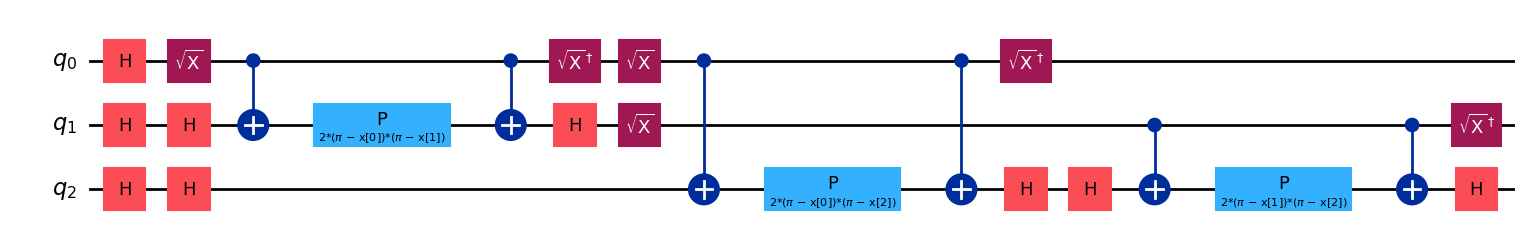

In [44]:
from qiskit.circuit.library import PauliFeatureMap

feature_map = PauliFeatureMap(3, reps = 1, paulis=["XY"])
feature_map.decompose().draw(output = "mpl", fold = 25)

In [45]:
feature_map.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

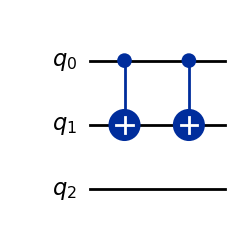

In [23]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.cx(0,1)
qc.cx(0,1)
qc.draw(output = "mpl", style='iqp')

In [ ]:
qc.append(feature_map, range(3))
qc.decompose().draw(output = "mpl", fold = 25)

In [ ]:
qnn = QNNCircuit(num_qubits=3, feature_map=qc)
qnn.decompose().draw(output = "mpl", fold = 25)

In [16]:
input_params = qnn.input_parameters
weight_params = qnn.weight_parameters

NameError: name 'qnn' is not defined

In [28]:
from qiskit_ibm_runtime.fake_provider import FakeKyiv, FakeLimaV2, FakeQuebec

# Get a fake backend from the fake provider
#sim = FakeKyiv()
#sim = FakeQuebec()
sim = FakeLimaV2()

In [49]:
from qiskit import transpile

circuit = transpile(qnn, sim, optimization_level=0)

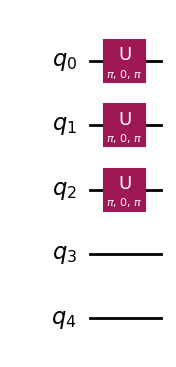

In [18]:
#TRANSPILATION OF X GATES
circuit.draw("mpl", style="clifford")
circuit.decompose().draw(output = "mpl", fold = 25)

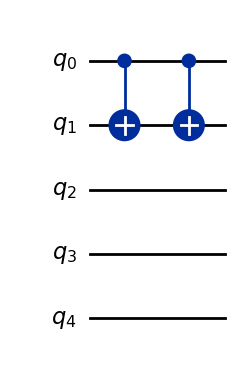

In [26]:
#TRANSPILATION OF TWO CX GATES
circuit.draw("mpl", style="clifford")
circuit.decompose().draw(output = "mpl", fold = 25)

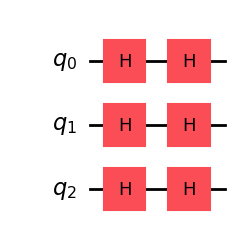

In [27]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(0)
qc.h(1)
qc.h(2)
qc.draw(output = "mpl", style='iqp')

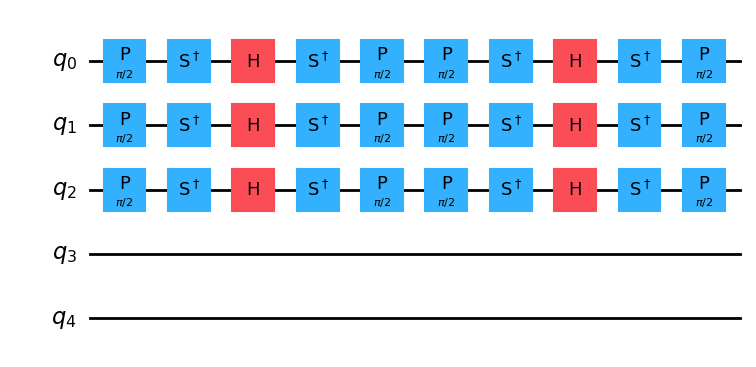

In [30]:
#TRANSPILATION OF TWO H GATES
circuit.draw("mpl", style="clifford")
circuit.decompose().draw(output = "mpl", fold = 25)

In [31]:
!pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 62.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 30.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.2.3
    Uninstalling qiskit-2.2.3:
      Successfully uninstalled qiskit-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed

In [32]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap

In [35]:

from qiskit_machine_learning.circuit.library import QNNCircuit

In [61]:
from qiskit import transpile

circuit = transpile(qnn, sim, optimization_level=0, routing_method='sabre', layout_method='sabre')

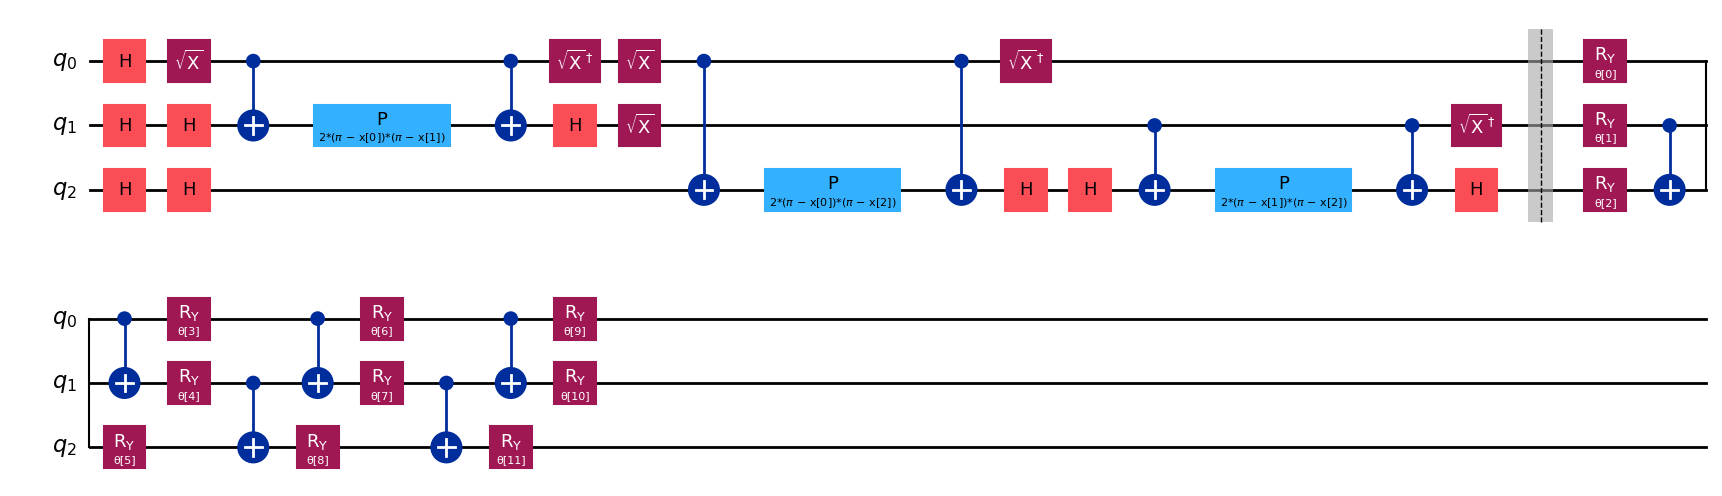

In [60]:
qnn = QNNCircuit(num_qubits=3, feature_map=feature_map)
qnn.decompose().draw(output = "mpl", fold = 25)

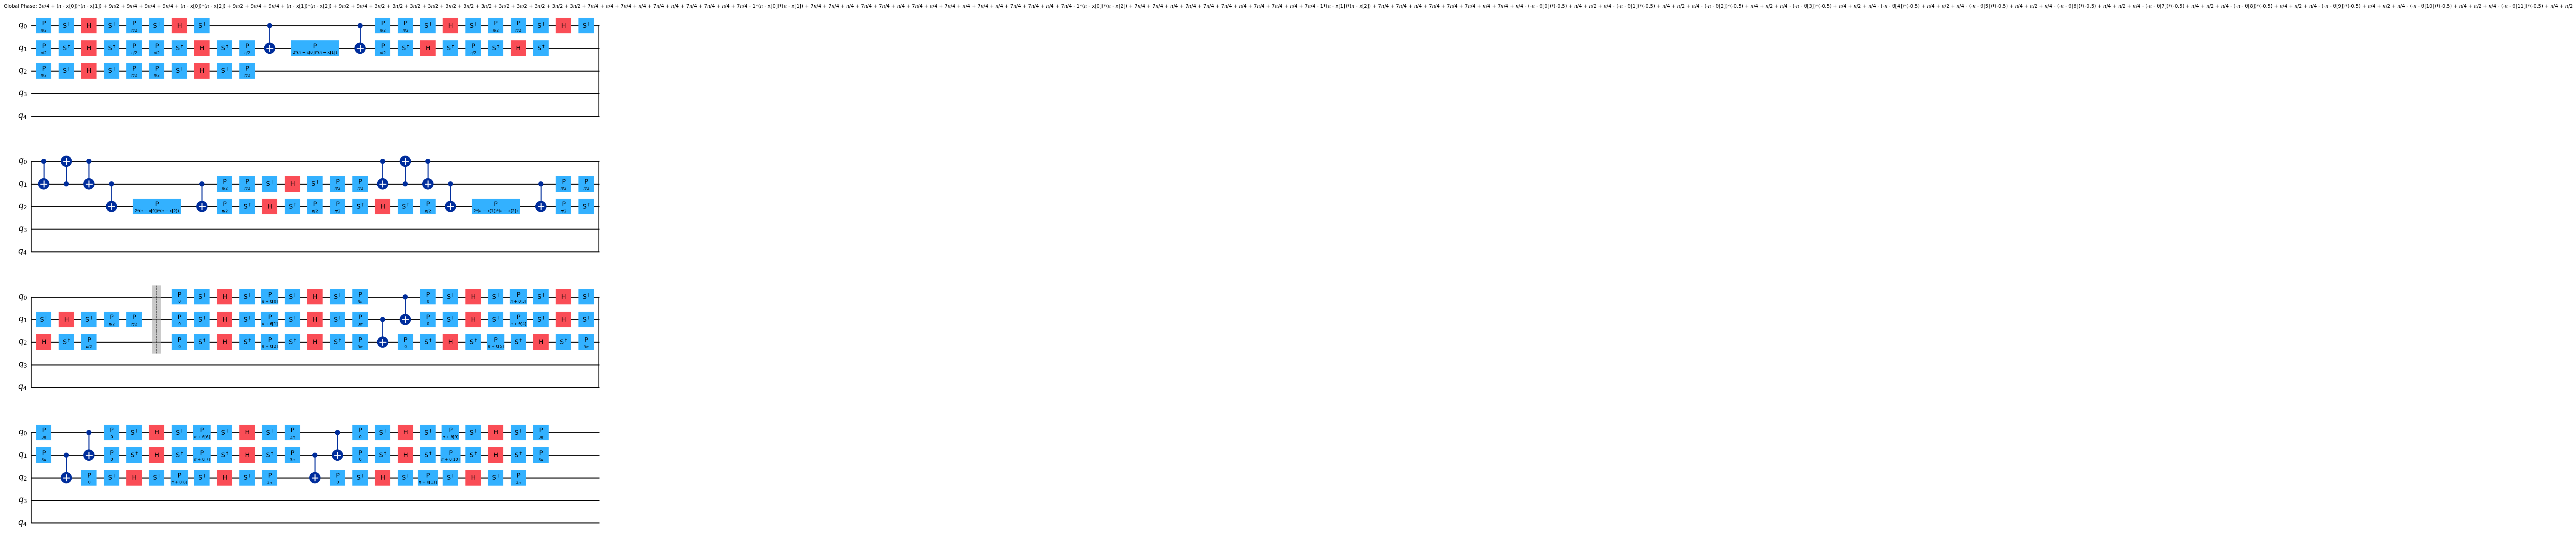

In [53]:
#TRANSPILATION OF QNN BASIC/TRIVIAL
circuit.draw("mpl", style="clifford")
circuit.decompose().draw(output = "mpl", fold = 25)

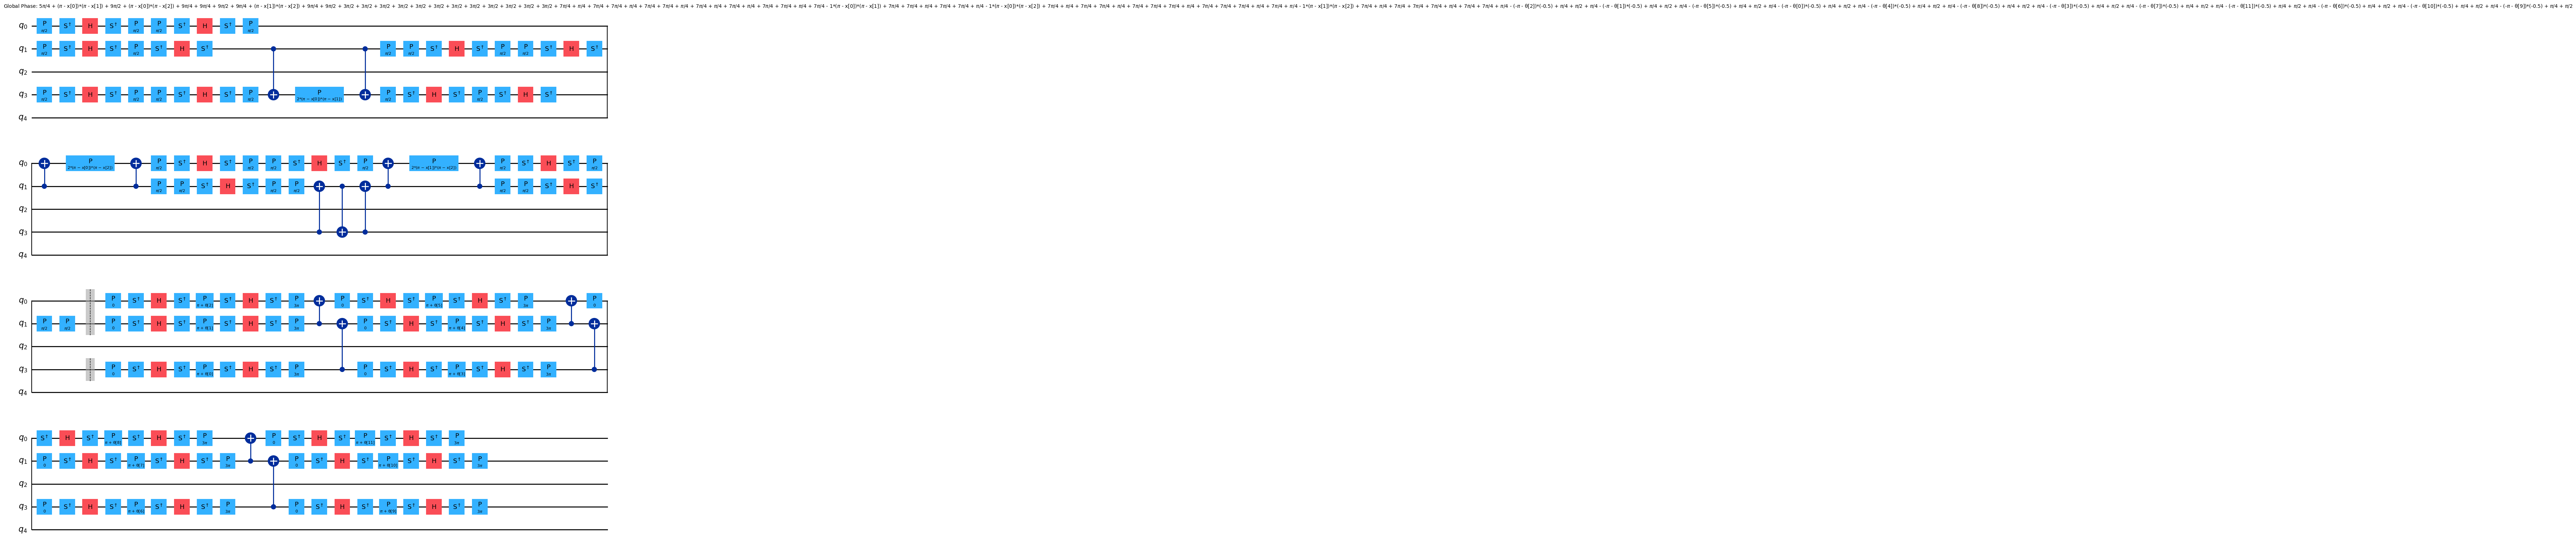

In [56]:
#TRANSPILATION OF QNN BASIC/SABRE
circuit.draw("mpl", style="clifford")
circuit.decompose().draw(output = "mpl", fold = 25)

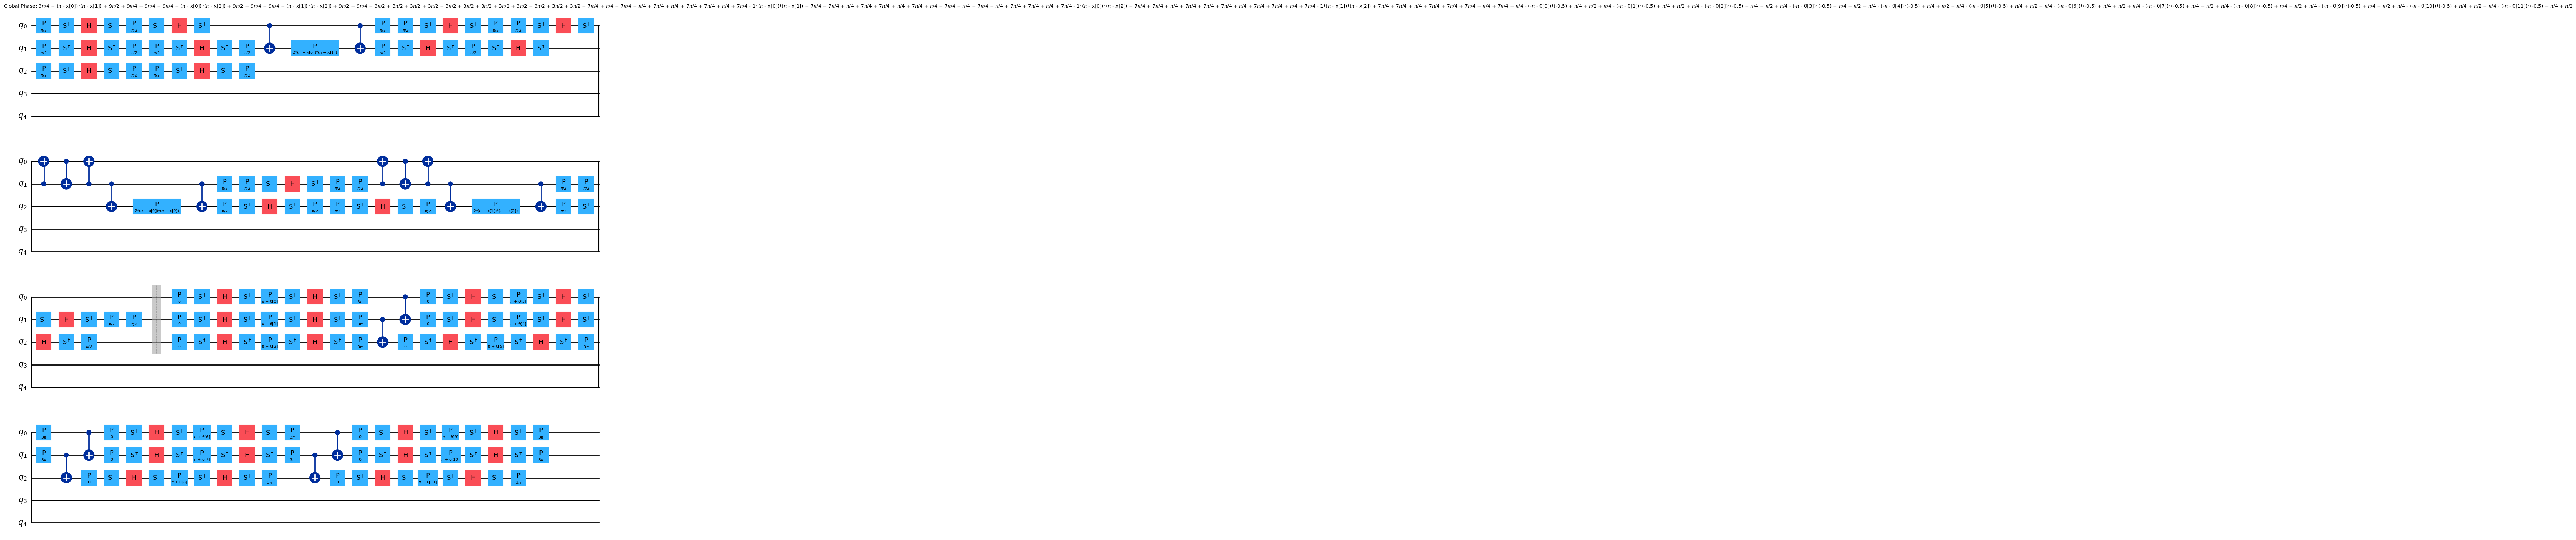

In [59]:
#TRANSPILATION OF QNN SABRE/TRIVIAL
circuit.draw("mpl", style="clifford")
circuit.decompose().draw(output = "mpl", fold = 25)

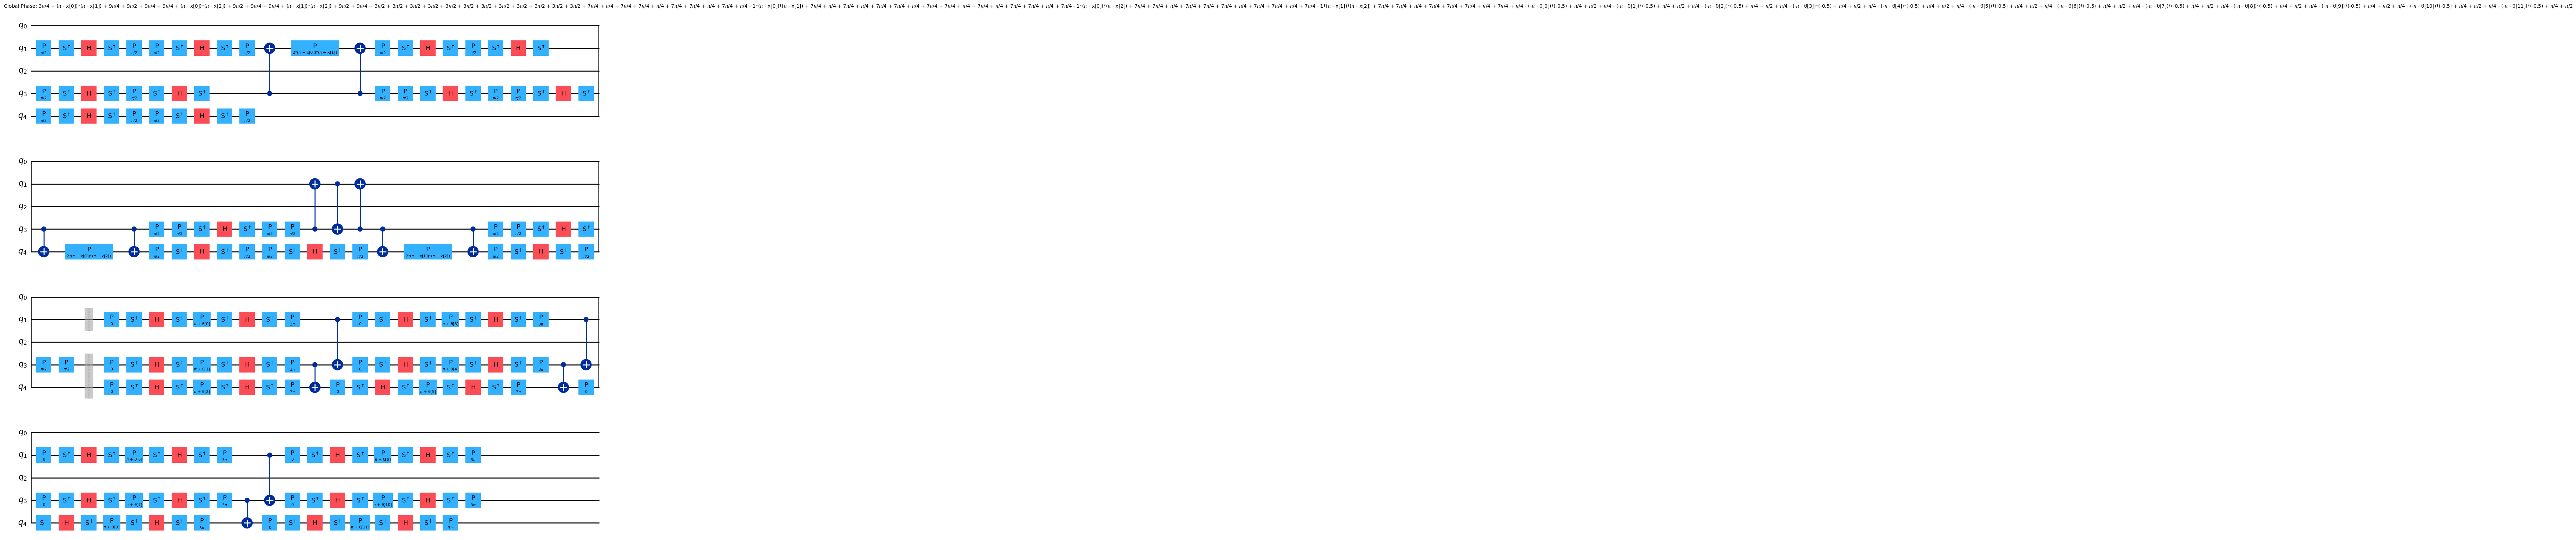

In [62]:
#TRANSPILATION OF QNN SABRE/SABRE
circuit.draw("mpl", style="clifford")
circuit.decompose().draw(output = "mpl", fold = 25)